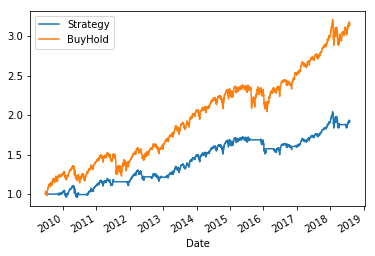

In [2]:
# Make sure the plot shows up
%matplotlib inline

# Import libraries that we need
import pandas as pd 
import numpy as np

# Read the data from disk
data = pd.read_csv('sp500.csv', index_col='Date', parse_dates=['Date'])

# Calculate two moving averages
data['SMA50'] = data['SP500'].rolling(50).mean()
data['SMA100'] = data['SP500'].rolling(100).mean()

# Set to 1 if SMA50 is above SMA100
data['Position'] = np.where(data['SMA50'] > data['SMA100'], 1, 0)

# Buy a day delayed, shift the column
data['Position'] = data['Position'].shift()

# Calculate the daily percent returns of strategy
data['StrategyPct'] = data['SP500'].pct_change(1) * data['Position']

# Calculate cumulative returns
data['Strategy'] = (data['StrategyPct'] + 1).cumprod()

# Calculate index cumulative returns
data['BuyHold'] = (data['SP500'].pct_change(1) + 1).cumprod()

# Plot the result
data[['Strategy', 'BuyHold']].plot()



In [3]:
data

,SP500,SMA50,SMA100,Position,StrategyPct,Strategy,BuyHold
Date,,,,,,,
2009-06-23,895.10,NaN,NaN,NaN,NaN,NaN,NaN
2009-06-24,900.94,NaN,NaN,0.0,0.000000,1.000000,1.006524
2009-06-25,920.26,NaN,NaN,0.0,0.000000,1.000000,1.028109
2009-06-26,918.90,NaN,NaN,0.0,-0.000000,1.000000,1.026589
2009-06-29,927.23,NaN,NaN,0.0,0.000000,1.000000,1.035895
2009-06-30,919.32,NaN,NaN,0.0,-0.000000,1.000000,1.027058
2009-07-01,923.33,NaN,NaN,0.0,0.000000,1.000000,1.031538
2009-07-02,896.42,NaN,NaN,0.0,-0.000000,1.000000,1.001475
2009-07-06,898.72,NaN,NaN,0.0,0.000000,1.000000,1.004044


In [5]:
data['Position']

Date
2009-06-23    NaN
2009-06-24    0.0
2009-06-25    0.0
2009-06-26    0.0
2009-06-29    0.0
2009-06-30    0.0
2009-07-01    0.0
2009-07-02    0.0
2009-07-06    0.0
2009-07-07    0.0
2009-07-08    0.0
2009-07-09    0.0
2009-07-10    0.0
2009-07-13    0.0
2009-07-14    0.0
2009-07-15    0.0
2009-07-16    0.0
2009-07-17    0.0
2009-07-20    0.0
2009-07-21    0.0
2009-07-22    0.0
2009-07-23    0.0
2009-07-24    0.0
2009-07-27    0.0
2009-07-28    0.0
2009-07-29    0.0
2009-07-30    0.0
2009-07-31    0.0
2009-08-03    0.0
2009-08-04    0.0
             ... 
2018-06-21    1.0
2018-06-22    1.0
2018-06-25    1.0
2018-06-26    1.0
2018-06-27    1.0
2018-06-28    1.0
2018-06-29    1.0
2018-07-02    1.0
2018-07-03    1.0
2018-07-05    1.0
2018-07-06    1.0
2018-07-09    1.0
2018-07-10    1.0
2018-07-11    1.0
2018-07-12    1.0
2018-07-13    1.0
2018-07-16    1.0
2018-07-17    1.0
2018-07-18    1.0
2018-07-19    1.0
2018-07-20    1.0
2018-07-23    1.0
2018-07-24    1.0
2018-07-25    1.0
2018-